In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('retail_sales_dataset.csv')
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [16]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [50]:
columnas_numericas = df.select_dtypes('int64').columns
columnas_categoricas = df.select_dtypes(include='object').columns
for col in columnas_categoricas:
    print(f"Valores únicos en la columna '{col}':")
    print(df[col].unique())
    print("\n")
# Revisar inconsistencias

Valores únicos en la columna 'Date':
['2023-11-24' '2023-02-27' '2023-01-13' '2023-05-21' '2023-05-06'
 '2023-04-25' '2023-03-13' '2023-02-22' '2023-12-13' '2023-10-07'
 '2023-02-14' '2023-10-30' '2023-08-05' '2023-01-17' '2023-01-16'
 '2023-02-17' '2023-04-22' '2023-04-30' '2023-09-16' '2023-11-05'
 '2023-01-14' '2023-10-15' '2023-04-12' '2023-11-29' '2023-12-26'
 '2023-08-03' '2023-04-23' '2023-08-18' '2023-10-29' '2023-05-23'
 '2023-01-04' '2023-03-23' '2023-12-24' '2023-06-24' '2023-03-21'
 '2023-04-21' '2023-06-22' '2023-07-14' '2023-02-19' '2023-07-03'
 '2023-06-26' '2023-11-06' '2023-05-16' '2023-01-23' '2023-08-24'
 '2023-10-02' '2023-03-05' '2023-07-13' '2023-02-10' '2023-10-10'
 '2023-05-31' '2023-11-18' '2023-11-13' '2023-07-05' '2023-10-23'
 '2023-04-09' '2023-12-27' '2023-02-05' '2023-01-24' '2023-12-05'
 '2023-04-27' '2023-05-29' '2023-02-21' '2023-08-21' '2023-11-22'
 '2023-07-06' '2023-03-25' '2023-07-09' '2023-07-01' '2023-04-18'
 '2023-12-10' '2023-05-17' '2023-12-16'

# Valores nulos y outliers

In [54]:
# No presenta valores nulos

columnas_con_outliers = []
columnas_numericas = df.select_dtypes(include=['float64', 'int64']).columns
columnas_categoricas = df.select_dtypes(include='object').columns

# Iterar sobre cada columna numérica y comprobar si tiene outliers
for columna in columnas_numericas:
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1

    # Verificar si hay valores fuera del rango 1.5 * IQR
    outliers = df[(df[columna] < (Q1 - 1.5 * IQR)) | (df[columna] > (Q3 + 1.5 * IQR))]
    if not outliers.empty:
        columnas_con_outliers.append(columna)

print(columnas_con_outliers)

# No presenta outliers

TypeError: 'make_column_selector' object is not iterable

# Análisis de Correlación

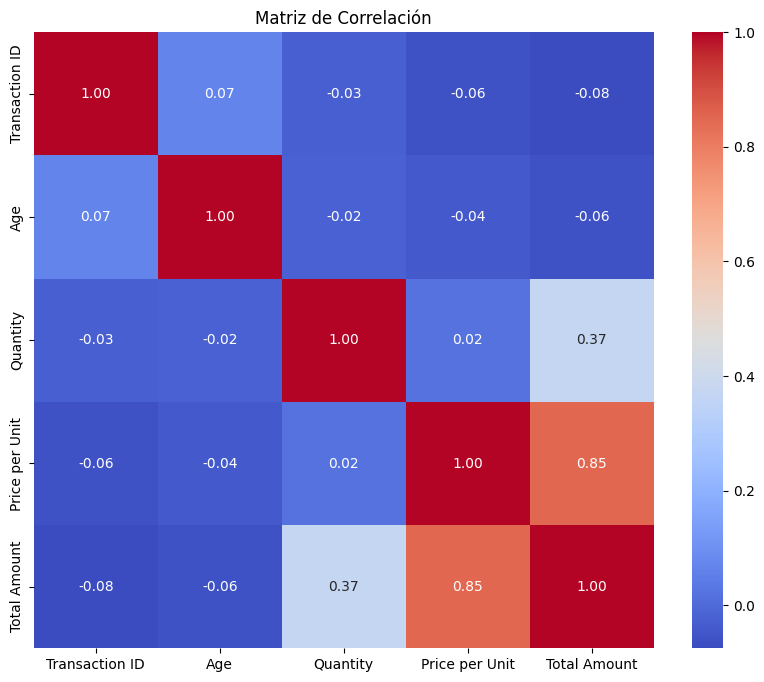

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns


correlation_matrix = df[columnas_numericas].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()


# Variables clave

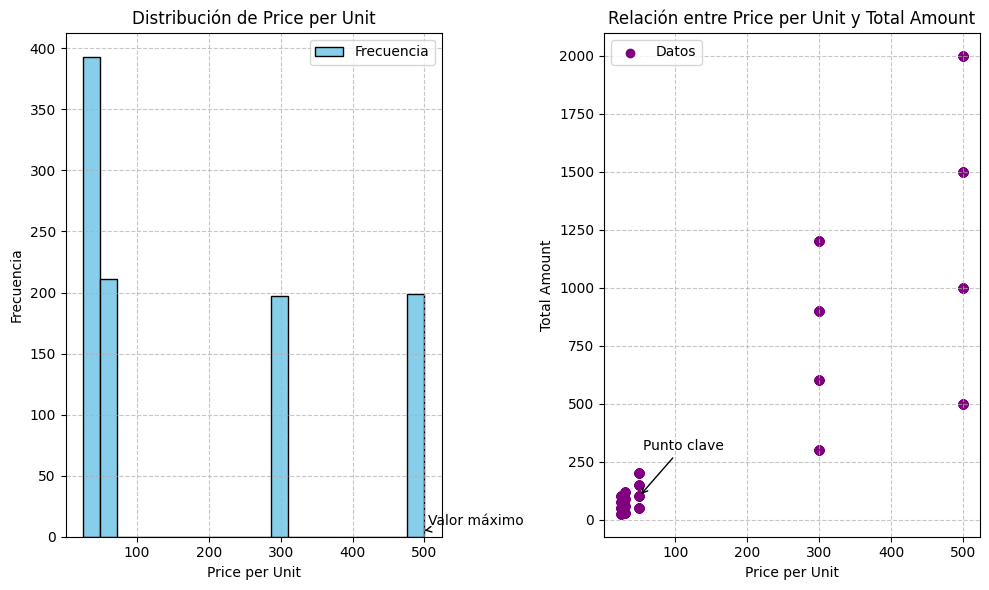

In [38]:
# Crear subplots para comparar diferentes variables clave

import matplotlib.pyplot as plt

# Crear la figura principal
fig1 = plt.figure(figsize=(10, 6))

# Subplot 1: Distribución de 'Price per Unit' con cuadrícula y leyenda
ax1 = fig1.add_subplot(1, 2, 1)
ax1.hist(df['Price per Unit'], bins=20, color='skyblue', edgecolor='black', label='Frecuencia')
ax1.set_title('Distribución de Price per Unit')
ax1.set_xlabel('Price per Unit')
ax1.set_ylabel('Frecuencia')
ax1.grid(True, linestyle='--', alpha=0.7)  # Añadir cuadrícula
ax1.legend()  # Añadir leyenda

# Añadir una anotación para el valor máximo en el histograma
max_value = df['Price per Unit'].max()
ax1.annotate('Valor máximo', xy=(max_value, 5), xytext=(max_value + 5, 10),
             arrowprops=dict(facecolor='black', arrowstyle='->'))
# Es el valor maximo de price per unit

# Subplot 2: Relación entre 'Price per Unit' y 'Total Amount' con cuadrícula y anotación
ax2 = fig1.add_subplot(1, 2, 2)
ax2.scatter(df['Price per Unit'], df['Total Amount'], color='purple', label='Datos')
ax2.set_title('Relación entre Price per Unit y Total Amount')
ax2.set_xlabel('Price per Unit')
ax2.set_ylabel('Total Amount')
ax2.grid(True, linestyle='--', alpha=0.7)  # Añadir cuadrícula
ax2.legend()  # Añadir leyenda

# Añadir una anotación para resaltar un punto clave en la relación
highlight_point = df[['Price per Unit', 'Total Amount']].iloc[10]
ax2.annotate('Punto clave', xy=(highlight_point['Price per Unit'], highlight_point['Total Amount']),
             xytext=(highlight_point['Price per Unit'] + 5, highlight_point['Total Amount'] + 200),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

# Ajustar espacio entre subplots
plt.tight_layout()
plt.show()


# Preprocesamiento de Datos

In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer, make_column_selector

num_cols = make_column_selector(dtype_include=['int64', 'float64'])
cat_cols = make_column_selector(dtype_include='object')

print(columnas_numericas)
print(columnas_categoricas)

pipeline_num = make_pipeline(StandardScaler())
pipeline_cat = make_pipeline(OneHotEncoder(handle_unknown='ignore'))

preprocessor = ColumnTransformer(
    transformers=[
        ('num', pipeline_num, num_cols),
        ('cat', pipeline_cat, cat_cols)
    ])

# Benchmarking de Técnicas de Machine Learning

In [60]:
# Regresión Lineal
# Modelo que prediga Total Amount


X = df.drop('Total Amount', axis=1)
y = df['Total Amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5851454)

pipeline_lr = make_pipeline(preprocessor, LinearRegression())
pipeline_lr.fit(X_train, y_train)

y_pred = pipeline_lr.predict(X_test)

# Evaluar rendimiento
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 50352.990171073274
R-squared: 0.8320929773154218


In [71]:
# KNN classifier
# Modelo que prediga gender

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

X2 = df.drop('Gender', axis=1)
y2 = df['Gender']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=5851454)

pipeline_knn = make_pipeline(preprocessor, KNeighborsClassifier())
pipeline_knn.fit(X2_train, y2_train)

y2_pred_knn = pipeline_knn.predict(X2_test)

# Evaluar rendimiento
accuracy = accuracy_score(y2_test, y2_pred_knn)
print(f"Accuracy: {accuracy}")
print(classification_report(y2_test, y2_pred_knn))



Accuracy: 0.53
              precision    recall  f1-score   support

      Female       0.54      0.58      0.56       102
        Male       0.52      0.48      0.50        98

    accuracy                           0.53       200
   macro avg       0.53      0.53      0.53       200
weighted avg       0.53      0.53      0.53       200



In [72]:
# Random Forest
# Modelo que prediga gender

from sklearn.ensemble import RandomForestClassifier

pipeline_rf = make_pipeline(preprocessor, RandomForestClassifier())
pipeline_rf.fit(X2_train, y2_train)

y2_pred_rf = pipeline_rf.predict(X2_test)

# Evaluar rendimiento
accuracy = accuracy_score(y2_test, y2_pred_rf)
print(f"Accuracy: {accuracy}")
print(classification_report(y2_test, y2_pred_rf))

Accuracy: 0.48
              precision    recall  f1-score   support

      Female       0.49      0.63      0.55       102
        Male       0.46      0.33      0.38        98

    accuracy                           0.48       200
   macro avg       0.47      0.48      0.47       200
weighted avg       0.48      0.48      0.47       200



# Utilizar validación cruzada para evaluar el rendimiento de los modelos

In [67]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import RandomizedSearchCV

# Validacion Cruzada para LR
mse_scores = cross_val_score(pipeline_lr, X, y, cv=5, scoring=make_scorer(mean_squared_error))

print(f"Mean Squared Error (mse) para cada partición: {mse_scores}")
print(f"Promedio de Mean Squared Error: {mse_scores.mean()}")

# Validacion Cruzada para KNN Classifier
accuracy_scores = cross_val_score(pipeline_knn, X2, y2, cv=5, scoring=make_scorer(accuracy_score))

print(f"Accuracy (accuracy) para cada partición: {accuracy_scores}")

# Validacion Cruzada para RF
accuracy_scores = cross_val_score(pipeline_rf, X2, y2, cv=5, scoring=make_scorer(accuracy_score))

print(f"Accuracy (accuracy) para cada partición: {accuracy_scores}")

Mean Squared Error (mse) para cada partición: [56827.63146187 55794.88792249 54232.38394686 60597.204674
 52194.89109514]
Promedio de Mean Squared Error: 55929.39982007114
Accuracy (accuracy) para cada partición: [0.475 0.53  0.535 0.54  0.525]
Accuracy (accuracy) para cada partición: [0.47  0.505 0.525 0.495 0.49 ]


# Análisis de Métricas

In [74]:
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix
# Generar un informe de clasificación para los modelos evaluados
print("Informe de Clasificación para Regresión Lineal:")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

print("\nInforme de Clasificación para KNN Classifier:")
print(classification_report(y2_test, y2_pred_knn))

print("\nInforme de Clasificación para Random Forest:")
print(classification_report(y2_test, y2_pred_rf))

# Incluir la matriz de confusión para una comprensión detallada de los errores de clasificación.
conf_matrix_knn = confusion_matrix(y2_test, y2_pred_knn)
print('Matriz de Confusión KNN:')
print(conf_matrix_knn)

conf_matrix_rf = confusion_matrix(y2_test, y2_pred_rf)
print('Matriz de Confusión RF:')
print(conf_matrix_rf)

Informe de Clasificación para Regresión Lineal:
Mean Squared Error: 50352.990171073274
R-squared: 0.8320929773154218

Informe de Clasificación para KNN Classifier:
              precision    recall  f1-score   support

      Female       0.54      0.58      0.56       102
        Male       0.52      0.48      0.50        98

    accuracy                           0.53       200
   macro avg       0.53      0.53      0.53       200
weighted avg       0.53      0.53      0.53       200


Informe de Clasificación para Random Forest:
              precision    recall  f1-score   support

      Female       0.49      0.63      0.55       102
        Male       0.46      0.33      0.38        98

    accuracy                           0.48       200
   macro avg       0.47      0.48      0.47       200
weighted avg       0.48      0.48      0.47       200

Matriz de Confusión KNN:
[[59 43]
 [51 47]]
Matriz de Confusión RF:
[[64 38]
 [66 32]]


# Curva ROC

In [79]:
# Crear y visualizar la curva ROC para los modelos de clasificación binaria
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_prob = pipeline_rf.predict_proba(X2_test)[:, 1]  # Probabilidad de la clase positiva

# Paso 2: Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Paso 3: Calcular el AUC
auc = roc_auc_score(y_test, y_prob)
print(f"AUC: {auc:.2f}")

# Paso 4: Visualizar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Línea de referencia
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid()
plt.show()

ValueError: columns are missing: {'Total Amount'}